# Exploring Yahoo Finance
This notebook is to explore the library of Yahoo Finance to gather the data of the stock market.

In [1]:
import yfinance as yf

COMPANY = 'AAPL'
DATAPOINTS = [
    'zip',
    'sector',
    'fullTimeEmployees',
    'longBusinessSummary',
    'shortName'
]

stock = yf.Ticker(COMPANY)

stock_info = stock.info

for key, value in stock_info.items():
    # if key in DATAPOINTS:
        print(str(key) + '\t' + str(value))

zip	95014
sector	Technology
fullTimeEmployees	147000
longBusinessSummary	Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple New

In [2]:
stock.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2020-05-08,0.205000,0.0
2020-08-07,0.205000,0.0
2020-08-31,0.000000,4.0


In [3]:
stock.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
stock.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.66%,% of Shares Held by Institutions
2,59.70%,% of Float Held by Institutions
3,4453,Number of Institutions Holding Shares


In [5]:
stock.institutional_holders

shareholders = stock.institutional_holders

print(shareholders.to_dict('index'))

{0: {'Holder': 'Vanguard Group, Inc. (The)', 'Shares': 1255155794, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.0748, 'Value': 166546622305}, 1: {'Holder': 'Blackrock Inc.', 'Shares': 1056461286, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.0629, 'Value': 140181848039}, 2: {'Holder': 'Berkshire Hathaway, Inc', 'Shares': 887135554, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.0528, 'Value': 117714016660}, 3: {'Holder': 'State Street Corporation', 'Shares': 638166552, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.038, 'Value': 84678319784}, 4: {'Holder': 'FMR, LLC', 'Shares': 358551697, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.021400000000000002, 'Value': 47576224674}, 5: {'Holder': 'Geode Capital Management, LLC', 'Shares': 247977084, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.0148, 'Value': 32904079275}, 6: {'Holder': 'Price (T.Rowe) Associates Inc', 'Shares': 210474648, 'Date Rep

In [6]:
stock.sustainability

,Value
2021-3,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,7.69
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [22]:
rec = stock.recommendations['Firm'][-10:]

print(rec)

Date
2021-01-28 12:27:30         Raymond James
2021-01-28 16:22:36     Canaccord Genuity
2021-01-28 16:31:45         Credit Suisse
2021-01-28 18:26:52             Bernstein
2021-01-28 18:59:50         Piper Sandler
2021-01-28 19:03:20           Wells Fargo
2021-01-28 19:08:11         Deutsche Bank
2021-01-28 19:09:14           DA Davidson
2021-03-10 12:43:57               Wedbush
2021-03-16 12:55:36    Evercore ISI Group
Name: Firm, dtype: object


In [8]:
calendar = stock.calendar.to_dict()

calendar = calendar.get('Value')

print(calendar)

None


In [9]:
PERIOD = '1y'
INTERVAL = '5d'
date_column = 'Date'

if INTERVAL in ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h']:
    date_column = 'Datetime'

stock_data = yf.download(
    tickers=COMPANY,  # Company Symbol
    period=PERIOD,
    interval=INTERVAL,
    prepost=True
)

[*********************100%***********************]  1 of 1 completed


In [10]:
# Open High Low Close Average
ohlc_avg = [
    (stock_data['Open'].values[i]
    + stock_data['High'].values[i]
    + stock_data['Low'].values[i]
    + stock_data['Close'].values[i])/4 
    for i in range(len(stock_data))
]

stock_data['OHLC'] = ohlc_avg

stock_data = stock_data.reset_index()

stock_data = stock_data.dropna()

# print(stock_data.to_dict('records'))

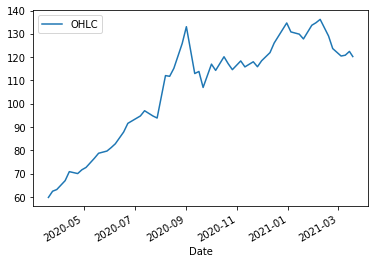

In [11]:
%matplotlib inline

graph = stock_data.plot.line(x=date_column, y='OHLC')

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

x = pd.to_datetime(stock_data[date_column]).values.astype(float).reshape(-1, 1)
y = stock_data[['OHLC']]

model = reg.fit(x, y)

price_prediction = model.predict(x)

print(price_prediction.ravel())
print(type(price_prediction))

[ 71.71970293  72.65509916  73.5904954   75.46128787  76.39668411
  78.26747658  79.20287281  80.13826905  82.00906152  82.94445775
  84.81525022  85.75064646  86.68604269  88.55683516  89.4922314
  92.2984201   93.23381634  95.10460881  96.04000505  97.91079752
  98.84619375  99.78158999 101.65238246 102.58777869 104.45857116
 105.3939674  106.32936363 108.2001561  109.13555234 111.00634481
 111.94174104 112.87713728 114.74792975 115.68332599 117.55411846
 118.48951469 119.42491093 121.2957034  122.23109963 125.03728834
 125.97268457 127.84347704 128.77887328 130.64966575 131.58506199
 132.52045822 134.39125069 135.32664693 137.1974394  138.13283563
 139.06823187 139.81654886]
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Latest 3 Months of Apple Share Price')

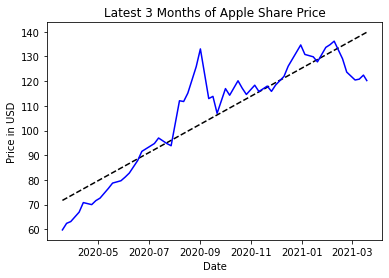

In [13]:
import matplotlib.pyplot as plt

plt.plot(stock_data[date_column], price_prediction, 'k--')
plt.plot(stock_data[date_column], stock_data['OHLC'], 'b-')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Latest 3 Months of Apple Share Price')

In [14]:
date_predict = ['2021-02-20']

x_predict = pd.to_datetime(date_predict)

y_predict = model.predict(x_predict.values.astype(float).reshape(-1, 1))

print('at {date}, the price will be around ${price}'.format(date=date_predict[0], price=round(y_predict[0][0], 2)))

at 2021-02-20, the price will be around $134.77


In [15]:
print(stock_data[date_column][0])
print(type(stock_data[date_column][0]))

2020-03-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
